In [1]:
import numpy as np
from copulas.multivariate import Multivariate
import matplotlib.pyplot as plt
from scipy.stats import expon
import pandas as pd
import utils

In [2]:
free_parameters = \
{'cov_para_1': 0.18167615397974568, 'cov_para_2': -0.6234475243883706, 'cov_para_3': 0.09890976245460237, 'cov_para_4': -0.05375370112406974, 'cov_para_5': 0.41403377651927864, 'cov_para_6': 0.42805600431695046, 'beta_1a': 12.229179161638806, 'beta_1b': 15.48700390805376, 'beta_2a': 5.398681025217028, 'beta_2b': 8.796495255971509, 'beta_3a': 11.908045326980305, 'beta_3b': 7.5447361781406315, 'beta_4a': 0.9544828845179285, 'beta_4b': 11.221488079336485, 'lambda_expon_1': 0.09737492935449865, 'lambda_expon_2': 0.0395616336913173, 'lambda_expon_3': 0.02344650715004244}

In [3]:
free_parameters = \
{'cov_para_1': 0.7892604627364547, 'cov_para_2': 0.6480906939385883, 'cov_para_3': -0.2785071869772713, 'cov_para_4': -0.0023746179166577175, 'cov_para_5': 0.3572304767776079, 'cov_para_6': 0.5506318568601846, 'beta_1a': 15.659723132595262, 'beta_1b': 12.330840765778913, 'beta_2a': 8.665597966608948, 'beta_2b': 6.9177030724959065, 'beta_3a': 15.665920211949498, 'beta_3b': 20.0, 'beta_4a': 8.585303272337093e-16, 'beta_4b': 10.140597100502342, 'lambda_expon_1': 0.05424476247453181, 'lambda_expon_2': 0.08728963882084122, 'lambda_expon_3': 0.04298357691262868}

In [4]:
free_parameters = \
{'cov_para_1': -0.06949259947307429, 'cov_para_2': 0.23929418034836003, 'cov_para_3': 0.39441937092703283, 'cov_para_4': 0.5122625089816987, 'cov_para_5': 0.04957641118779821, 'cov_para_6': -0.17890348702479064, 'beta_1a': 7.779402292936231, 'beta_1b': 15.99508024054407, 'beta_2a': 10.415067866085819, 'beta_2b': 12.093051778272159, 'beta_3a': 7.509928267075036, 'beta_3b': 14.275439706895245, 'beta_4a': 1.3921558019510774, 'beta_4b': 7.916125737682833, 'lambda_expon_1': 0.059660893731805935, 'lambda_expon_2': 0.04483797185269005, 'lambda_expon_3': 0.052272870139135216}

In [5]:
free_parameters = \
{'cov_para_1': -0.026603034072311127, 'cov_para_2': -0.09862398002566897, 'cov_para_3': 0.8223102344389764, 'cov_para_4': 0.2877514802615496, 'cov_para_5': -0.7673728803798269, 'cov_para_6': 0.16730465300161457, 'beta_1a': 2.227146911624191, 'beta_1b': 15.215892476546477, 'beta_2a': 6.16141409253979, 'beta_2b': 9.910972148056503, 'beta_3a': 0.8393186592270457, 'beta_3b': 3.3178126147862326, 'beta_4a': 0.9000581116897484, 'beta_4b': 17.059254167516706, 'lambda_expon_1': 0.045669879474247554, 'lambda_expon_2': 0.03765524011357802, 'lambda_expon_3': 0.05352683823415893}

In [6]:
free_para1 = free_parameters['cov_para_1']
free_para2 = free_parameters['cov_para_2']
free_para3 = free_parameters['cov_para_3']
free_para4 = free_parameters['cov_para_4']
free_para5 = free_parameters['cov_para_5']
free_para6 = free_parameters['cov_para_6']

diag_1 = 1
diag_2 = np.sqrt(1-free_para1**2)
if (1-free_para2**2-free_para3**2)<0:
    diag_3 = np.sqrt(np.abs(1-free_para2**2-free_para3**2))
else:
    diag_3 = np.sqrt(1-free_para2**2-free_para3**2)

if (1-free_para4**2-free_para5**2-free_para6**2)<0:
    diag_4 = np.sqrt(np.abs(1-free_para4**2-free_para5**2-free_para6**2))
else:
    diag_4 = np.sqrt(1-free_para4**2-free_para5**2-free_para6**2)

lower_triangular_matrix = np.asarray([[diag_1,0,0,0],
                        [free_para1,diag_2,0,0],
                        [free_para2,free_para3,diag_3,0],
                        [free_para4,free_para5,free_para6,diag_4]])


cov_matrix = lower_triangular_matrix@lower_triangular_matrix.transpose()


#now, define the marginal distribution of the gaussian copula
univerates = [{'loc': 0,
'scale': 1,
'a': free_parameters['beta_1a'],
'b': free_parameters['beta_1b'],
'type': 'copulas.univariate.beta.BetaUnivariate'},
{'loc': 0,
'scale': 1,
'a': free_parameters['beta_2a'],
'b': free_parameters['beta_2b'],
'type': 'copulas.univariate.beta.BetaUnivariate'},
{'loc': 0,
'scale': 1,
'a': free_parameters['beta_3a'],
'b': free_parameters['beta_3b'],
'type': 'copulas.univariate.beta.BetaUnivariate'},
{'loc': 0,
'scale': 1,
'a': free_parameters['beta_4a'],
'b': free_parameters['beta_4b'],
'type': 'copulas.univariate.beta.BetaUnivariate'}]


#now, we construct the gaussian copula
copula_parameters = {}
copula_parameters['covariance'] = cov_matrix
copula_parameters['univariates'] = univerates
copula_parameters['type'] = 'copulas.multivariate.gaussian.GaussianMultivariate'
copula_parameters['columns'] = [0,1,2,3]

new_dist = Multivariate.from_dict(copula_parameters)

In [7]:
cov_matrix

array([[ 1.        , -0.02660303, -0.09862398,  0.28775148],
       [-0.02660303,  1.        ,  0.8246429 , -0.77475635],
       [-0.09862398,  0.8246429 ,  1.        , -0.56563561],
       [ 0.28775148, -0.77475635, -0.56563561,  1.        ]])

In [8]:
#let's sample and plot the marginal distribution
samples = new_dist.sample(5000)

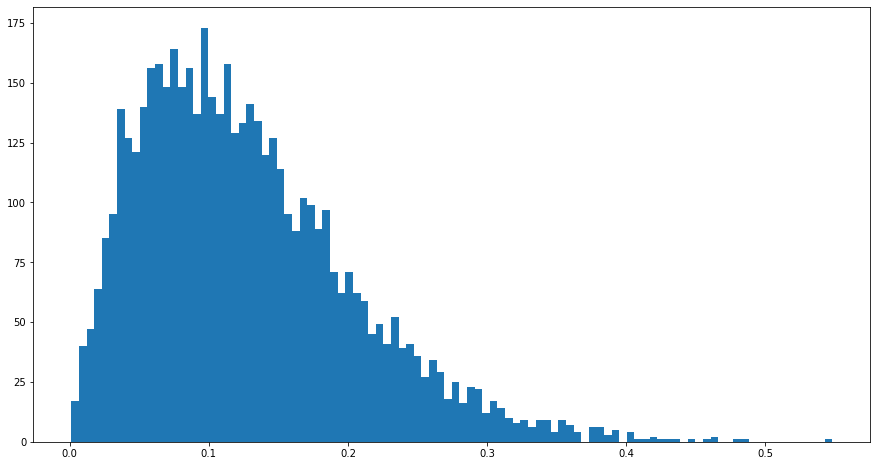

In [9]:
plt.rcParams["figure.figsize"] = (15,8)

plt.hist(samples[0],bins = 100)
plt.show()

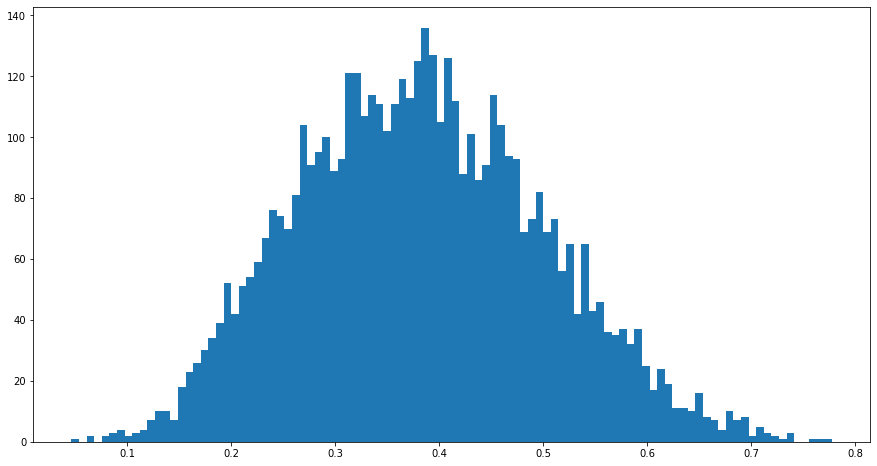

In [10]:
plt.hist(samples[1],bins = 100)
plt.show()

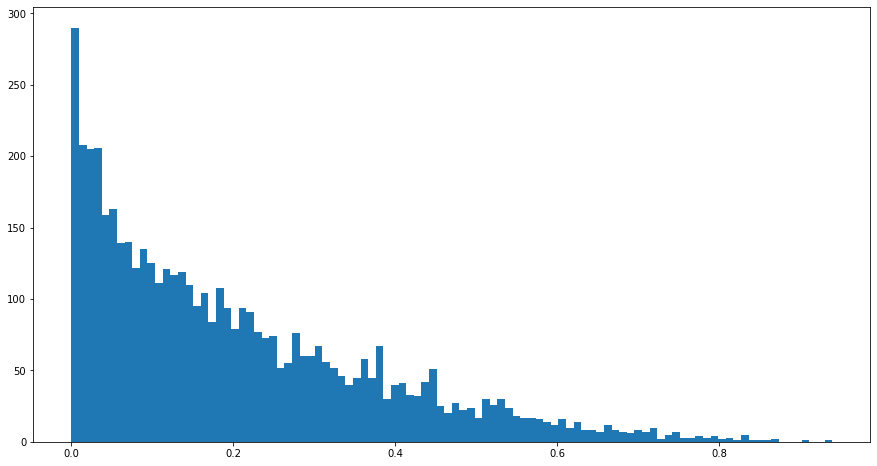

In [11]:
plt.hist(samples[2],bins = 100)
plt.show()

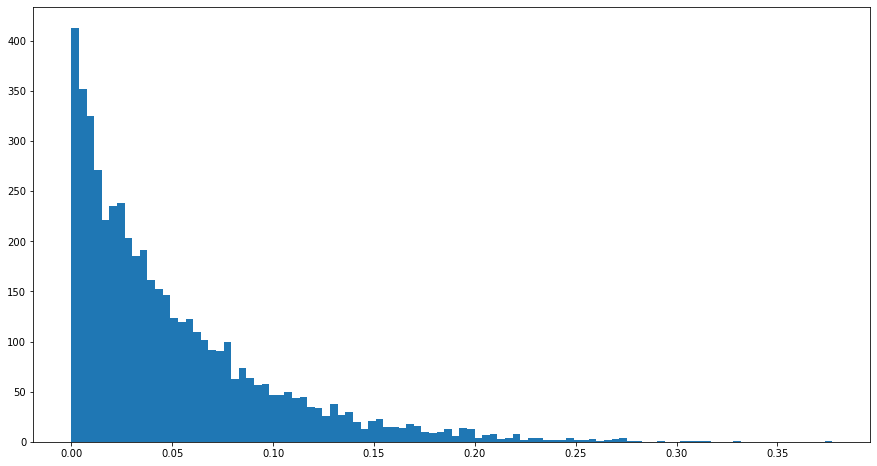

In [12]:
plt.hist(samples[3],bins = 100)
plt.show()

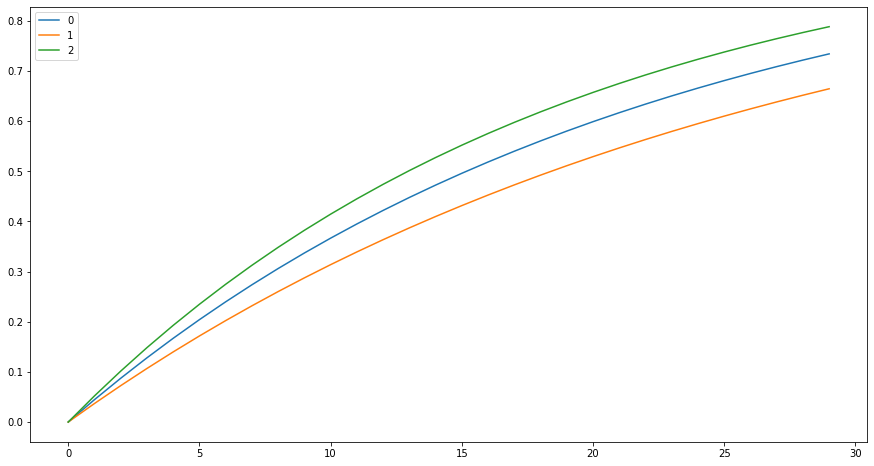

In [13]:
#other parameters needed for transforming the features
lambda_expon_1 = free_parameters['lambda_expon_1']
lambda_expon_2 = free_parameters['lambda_expon_2']
lambda_expon_3 = free_parameters['lambda_expon_3']
lambda_expons = [lambda_expon_1,lambda_expon_2,lambda_expon_3]


for line_index in range(0,len(lambda_expons)):

    x_plot = []
    y_plot = []
    
    for fake_days in range(0,30):
        r = expon.cdf(fake_days,scale = 1.0/lambda_expons[line_index])
        y_plot.append(r)
        x_plot.append(fake_days)

    plt.plot(x_plot,y_plot,label = str(line_index))

plt.legend()
plt.show()

In [14]:
import trading_vix
env = trading_vix.trading_vix()

In [15]:
env.index_feature_dataframe

,vix_price_adj_close,vix_adj_close,days_since_5,days_since_6,days_since_7
0,44.680000,10.390000,15,15,148
1,43.720001,10.160000,16,16,149
2,44.320000,10.700000,17,17,150
3,44.799999,11.460000,1,18,151
4,43.279999,10.420000,2,19,152
...,...,...,...,...,...
995,8.190000,20.670000,3,7,80
996,8.080000,20.150000,4,8,81
997,7.710000,18.400000,5,9,82
998,7.710000,18.840000,6,10,83


In [16]:
env.reset(return_price=True)

(34.869999,
 array([[2.],
        [6.],
        [9.],
        [0.]]),
 10000.0)

In [17]:
#other parameters needed for transforming the features
lambda_expon_1 = free_parameters['lambda_expon_1']
lambda_expon_2 = free_parameters['lambda_expon_2']
lambda_expon_3 = free_parameters['lambda_expon_3']
lambda_expons = [lambda_expon_1,lambda_expon_2,lambda_expon_3]

In [18]:
visualize_time_length = 200

price_history = []
action_history1 = np.zeros((1,visualize_time_length+1))
action_history2 = np.zeros((1,visualize_time_length+1))
portfolio_value_history = []
transaction_value_history = []

price,current_feature,portfolio_value = env.reset(return_price=True)
price_history.append(price)
portfolio_value_history.append(portfolio_value)
transaction_value_history.append(0)

for time_index in range(0,visualize_time_length):
    
    #compute an action given current observation
    transformed_features = []
    for feature_index in range(len(lambda_expons)):
        transformation = expon.cdf(current_feature[feature_index,0],scale = 1.0/lambda_expons[feature_index])
        min_transformation = 0.1
        transformation = min_transformation*np.exp(np.log(1.0/min_transformation)*transformation)
        transformed_features.append(transformation)
    transformed_features = np.asarray(transformed_features)
    transformed_features = np.reshape(transformed_features,(1,-1))
    #holding_position = expit(current_feature[-1,:][0])
    holding_position = current_feature[-1,:][0]
    if holding_position<0:
        print('holding is less than 0, there is some problem and the holding position is',holding_position)
    if holding_position>1:
        print('holding is greater than 1, there is some problem and the holding position is',holding_position)
    min_transformed_holding = 0.1
    transformed_holding = min_transformed_holding*np.exp(np.log(1.0/min_transformed_holding)*holding_position)
    transformed_holding = np.reshape(transformed_holding,(1,1))
    data_point_for_df = np.concatenate((transformed_features,transformed_holding),axis = 1)

    assert data_point_for_df.shape[1] == 4
    data_point_for_copula = pd.DataFrame(data_point_for_df)
    action = new_dist.cdf(data_point_for_copula)
    
    #apply the action to the environment
    price, current_feature,execute_action,need_to_buy,need_to_sell,portfolio_value,transaction_value\
    = env.step(action,return_price=True)

#     if execute_action and need_to_buy:
#         print('buy')
#         print('time index is',time_index)
#     if execute_action and need_to_sell:
#         print('sell')
#         print('time index is',time_index)
    
    #record price and action
    price_history.append(price)
    if execute_action:
        if need_to_buy:
            action_history1[0,time_index+1] = 2 #add 1 because of initial price observation
            #print('record buy action')
        if need_to_sell:
            action_history1[0,time_index+1] = 1
            #print('record sell action')

    action_history2[0,time_index+1] = action 
    portfolio_value_history.append(portfolio_value)
    transaction_value_history.append(transaction_value)

In [19]:
print(action_history1.shape)
print(action_history2.shape)
print(len(price_history))
print(len(portfolio_value_history))
print(len(transaction_value_history))

(1, 201)
(1, 201)
201
201
201


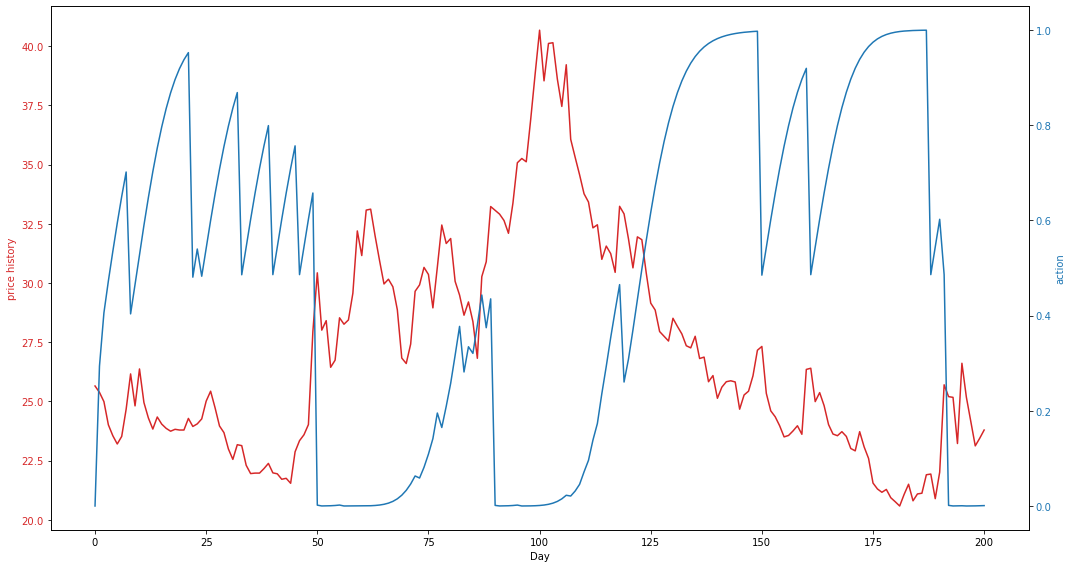

In [20]:
plt.rcParams["figure.figsize"] = (15,8)

fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('Day')
ax1.set_ylabel('price history', color=color)
ax1.plot(price_history, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('action', color=color)  # we already handled the x-label with ax1
ax2.plot(action_history2[0,:], color=color)
ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

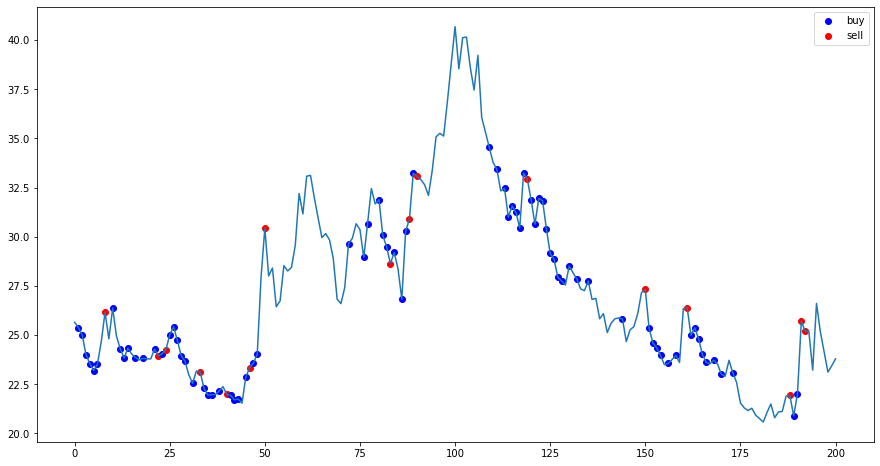

In [21]:
already_plotted_sell_legend = False
already_plotted_buy_legend = False

plt.plot(price_history)
for time_index in range(0,len(action_history1[0])):

    if action_history1[0,time_index]==2:
        #print('the buy price is',price_history[time_index])
        if already_plotted_sell_legend == False:
            plt.scatter(time_index,price_history[time_index],color = 'b',label = 'buy')
            already_plotted_sell_legend = True
        else:
            plt.scatter(time_index,price_history[time_index],color = 'b')

    elif action_history1[0,time_index]==1:
        #print('the sell price is',price_history[time_index])
        #print(' ')
        if already_plotted_buy_legend == False:
            plt.scatter(time_index,price_history[time_index],color = 'r',label = 'sell')
            already_plotted_buy_legend = True
        else:
            plt.scatter(time_index,price_history[time_index],color = 'r')
plt.legend()
plt.show()

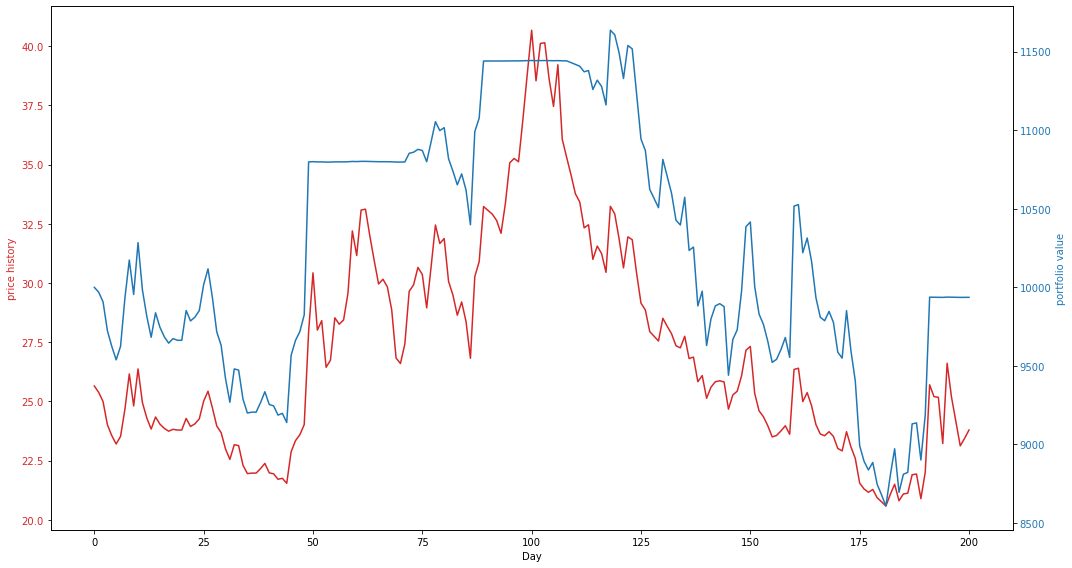

In [22]:
plt.rcParams["figure.figsize"] = (15,8)

fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('Day')
ax1.set_ylabel('price history', color=color)
ax1.plot(price_history, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('portfolio value', color=color)  # we already handled the x-label with ax1
ax2.plot(portfolio_value_history, color=color)
ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

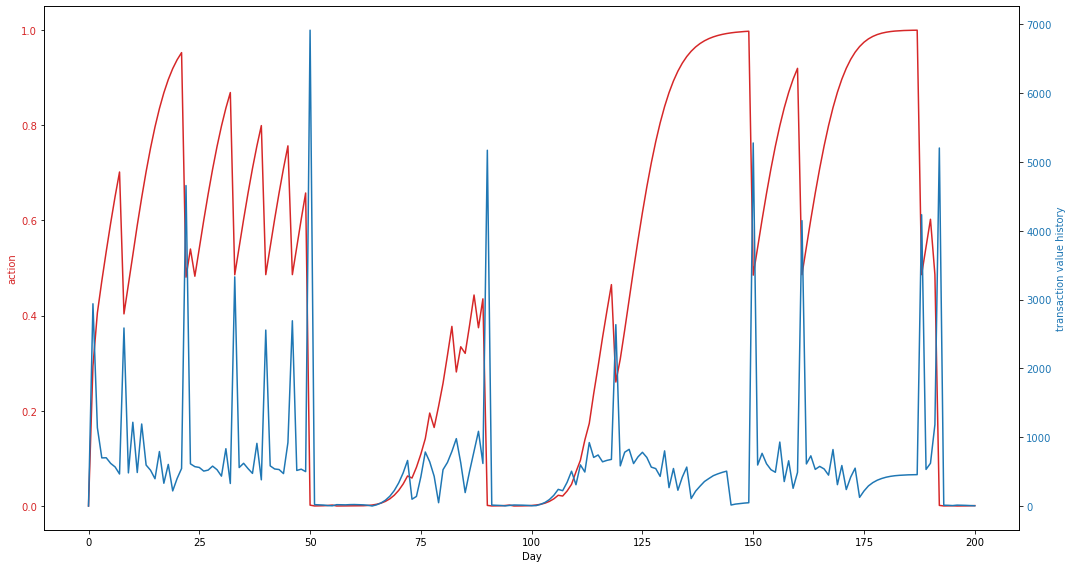

In [23]:
plt.rcParams["figure.figsize"] = (15,8)

fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('Day')
ax1.set_ylabel('action', color=color)
ax1.plot(action_history2[0,:], color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('transaction value history', color=color)  # we already handled the x-label with ax1
ax2.plot(transaction_value_history, color=color)
ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [24]:
df = pd.DataFrame()
df['suggested stock-total portfolio ratio'] = action_history2[0,:][0:35].tolist()
df['transaction_value'] = transaction_value_history[0:35]
df['execute_action'] = action_history1[0,:][0:35].tolist()

In [25]:
df

,suggested stock-total portfolio ratio,transaction_value,execute_action
0,0.000000,0.000000,0.0
1,0.293914,2939.137189,2.0
2,0.405876,1138.003607,2.0
3,0.472750,699.452912,2.0
4,0.534898,701.121926,2.0
5,0.594435,619.297271,2.0
6,0.650334,567.682131,2.0
7,0.701790,465.293416,0.0
8,0.403680,2587.115674,1.0
9,0.465181,481.306162,0.0


In [26]:
action_history2[0,:][0:25]

array([0.        , 0.29391372, 0.40587595, 0.47274994, 0.53489849,
       0.59443488, 0.65033447, 0.70178971, 0.40367962, 0.46518117,
       0.52730446, 0.58982849, 0.6480808 , 0.70265573, 0.75221425,
       0.79642713, 0.83506729, 0.86817721, 0.89602504, 0.91902274,
       0.93769877, 0.952616  , 0.48082793, 0.53995393, 0.48278444])

In [27]:
transaction_value_history[0:25]

[0,
 2939.1371891331,
 1138.003607417083,
 699.4529116231084,
 701.121925579474,
 619.2972709280695,
 567.6821310280752,
 465.2934155296221,
 2587.1156736200533,
 481.3061623508747,
 1217.0388910693498,
 487.0116536125868,
 1191.8274394345517,
 594.9979672157982,
 519.4908709396943,
 396.3395460406707,
 791.5988484659881,
 330.7289742050642,
 604.6664821946756,
 219.4461685649798,
 400.79374938067446,
 544.936450400276,
 4657.24090734745,
 613.0531522078571,
 572.0229916889203]

In [28]:
print(portfolio_value_history[0])
print(portfolio_value_history[-1])

10000.0
9936.335144113886


In [31]:
end_portfolio_values = []


for iter_index in range(0,10):
    print(iter_index)
    
    visualize_time_length = 200

    price_history = []
    action_history1 = np.zeros((1,visualize_time_length+1))
    action_history2 = np.zeros((1,visualize_time_length+1))
    portfolio_value_history = []

    price,current_feature,portfolio_value = env.reset(return_price=True)
    price_history.append(price)
    portfolio_value_history.append(portfolio_value)

    for time_index in range(0,visualize_time_length):

        #compute an action given current observation
        transformed_features = []
        for feature_index in range(len(lambda_expons)):
            transformation = expon.cdf(current_feature[feature_index,0],scale = 1.0/lambda_expons[feature_index])
            min_transformation = 0.1
            transformation = min_transformation*np.exp(np.log(1.0/min_transformation)*transformation)
            transformed_features.append(transformation)
        transformed_features = np.asarray(transformed_features)
        transformed_features = np.reshape(transformed_features,(1,-1))
        #holding_position = expit(current_feature[-1,:][0])
        holding_position = current_feature[-1,:][0]
        if holding_position<0:
            print('holding is less than 0, there is some problem and the holding position is',holding_position)
        if holding_position>1:
            print('holding is greater than 1, there is some problem and the holding position is',holding_position)
        min_transformed_holding = 0.1
        transformed_holding = min_transformed_holding*np.exp(np.log(1.0/min_transformed_holding)*holding_position)
        transformed_holding = np.reshape(transformed_holding,(1,1))
        data_point_for_df = np.concatenate((transformed_features,transformed_holding),axis = 1)

        assert data_point_for_df.shape[1] == 4
        data_point_for_copula = pd.DataFrame(data_point_for_df)
        action = new_dist.cdf(data_point_for_copula)

        #apply the action to the environment
        price, current_feature,execute_action,need_to_buy,need_to_sell,portfolio_value,transaction_value\
        = env.step(action,return_price=True)

        #apply the action to the environment
        price, current_feature,execute_action,need_to_buy,need_to_sell,portfolio_value,r = env.step(action,return_price=True)

    #     if execute_action and need_to_buy:
    #         print('buy')
    #         print('time index is',time_index)
    #     if execute_action and need_to_sell:
    #         print('sell')
    #         print('time index is',time_index)

        #record price and action
        price_history.append(price)
        if execute_action:
            if need_to_buy:
                action_history1[0,time_index+1] = 2 #add 1 because of initial price observation
                #print('record buy action')
            if need_to_sell:
                action_history1[0,time_index+1] = 1
                #print('record sell action')

        action_history2[0,time_index+1] = action 
        portfolio_value_history.append(portfolio_value)
        
        
    end_portfolio_values.append(portfolio_value_history[-1])

0
1


IndexError: single positional indexer is out-of-bounds

In [ ]:
plt.hist(end_portfolio_values,bins = 100)
plt.show()

In [ ]:
np.mean(end_portfolio_values)

In [ ]:
np.mean(end_portfolio_values)-np.std(end_portfolio_values)